# topsis熵权

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [160]:
# 读取数据
data = pd.read_excel("no_error.xlsx")
#data_com=pd.read_excel("complete.xlsx")
# 提取睡眠质量指标并进行归一化
sleep_quality = data[["整晚睡眠时间", "睡醒次数", "入睡方式"]]
scaler = MinMaxScaler()
scaled_sleep_quality = scaler.fit_transform(sleep_quality)

In [161]:
# 熵权法计算指标权重
def entropy_weight(data):
    # 为每个指标的取值范围加上微小值
    data = data + 0.001
    # 计算熵
    p = data / data.sum()
    log_p = np.log(p)
    e = -(p * log_p).sum()
    # 计算权重
    w = (1 - e) / (3 - e)
    return w

In [162]:
weights0 = entropy_weight(scaled_sleep_quality[:,0])
weights1 = entropy_weight(scaled_sleep_quality[:,1])
weights2 = entropy_weight(scaled_sleep_quality[:,2])

In [163]:
weights1

1.8480780269917412

In [164]:
# 计算综合睡眠质量得分
# 睡眠时间越长越好
scaled_sleep_time_score = weights1 * scaled_sleep_quality[:, 0]
# 入睡方式越大越好
scaled_sleep_way_score = weights0 * scaled_sleep_quality[:, 2]
# 睡醒次数越少越好
scaled_wakeup_score = weights2 * (1 - scaled_sleep_quality[:, 1])

In [165]:
scaled_wakeup_score

array([1.23699649, 1.76713784, 1.59042406, 1.41371028, 1.59042406,
       1.76713784, 1.59042406, 1.59042406, 1.59042406, 1.76713784,
       1.23699649, 1.41371028, 1.76713784, 1.76713784, 1.41371028,
       1.59042406, 1.76713784, 1.59042406, 1.76713784, 1.41371028,
       1.76713784, 1.59042406, 1.76713784, 1.59042406, 1.76713784,
       1.76713784, 1.41371028, 1.59042406, 1.41371028, 1.76713784,
       1.76713784, 1.76713784, 1.59042406, 1.76713784, 1.76713784,
       1.41371028, 1.59042406, 1.23699649, 1.76713784, 1.76713784,
       1.41371028, 1.41371028, 1.59042406, 1.59042406, 1.41371028,
       1.23699649, 1.76713784, 1.76713784, 1.41371028, 1.59042406,
       1.23699649, 1.06028271, 1.76713784, 0.88356892, 1.59042406,
       1.59042406, 1.59042406, 1.23699649, 1.76713784, 1.59042406,
       1.76713784, 1.76713784, 1.59042406, 1.59042406, 1.76713784,
       1.23699649, 0.88356892, 1.59042406, 1.41371028, 1.76713784,
       1.41371028, 0.88356892, 1.76713784, 1.76713784, 1.41371

# 评价

In [166]:
# 计算相似度得分
similarity_score = scaled_sleep_time_score + scaled_sleep_way_score + scaled_wakeup_score

# 归一化相似度得分
normalized_similarity_score = (similarity_score - similarity_score.min()) / (similarity_score.max() - similarity_score.min())

# 添加综合睡眠质量列
data["综合睡眠质量"] = pd.cut(normalized_similarity_score, bins=[-0.001, 0.25, 0.5, 0.75, 1], labels=["差", "中", "良", "优"])

# 输出结果
print(data[["编号", "综合睡眠质量"]])

      编号 综合睡眠质量
0      1      良
1      2      优
2      3      良
3      4      良
4      5      优
..   ...    ...
374  386      良
375  387      优
376  388      良
377  389      差
378  390      优

[379 rows x 2 columns]


# 随机森林建立关联模型

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 读取数据
data1 = pd.read_excel("no_error.xlsx")

# 提取特征和标签
X = data1[["母亲年龄", "婚姻状况", "教育程度", "妊娠时间", "分娩方式", "CBTS", "EPDS", "HADS"]]
#X = data1[["母亲年龄","教育程度", "分娩方式", "CBTS", "EPDS", "HADS"]]
y = data["综合睡眠质量"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立随机森林模型
rf_model = RandomForestClassifier(max_depth=1,n_estimators=161, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.618421052631579
              precision    recall  f1-score   support

           中       0.00      0.00      0.00         4
           优       0.62      0.98      0.76        47
           差       0.00      0.00      0.00         4
           良       0.50      0.05      0.09        21

    accuracy                           0.62        76
   macro avg       0.28      0.26      0.21        76
weighted avg       0.52      0.62      0.49        76



D:\anaconda\envs\clone1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\clone1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\clone1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 随机森林可视化调参

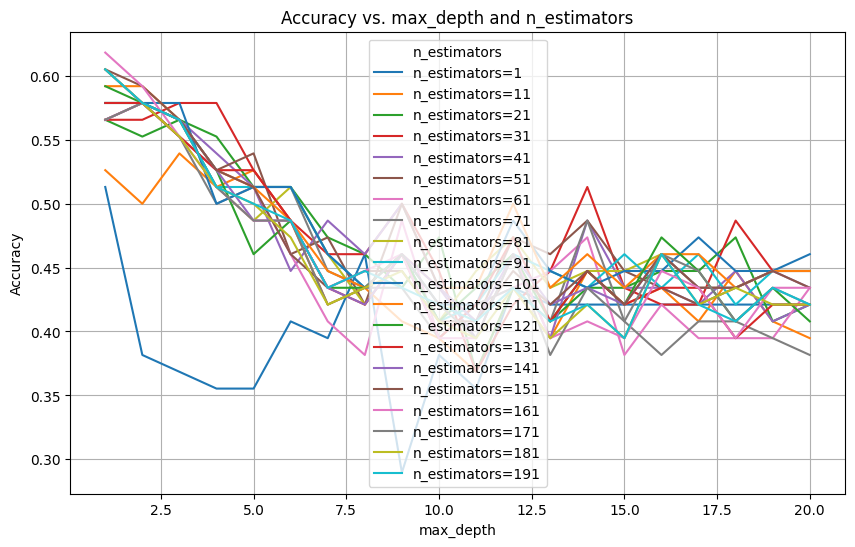

In [117]:
import matplotlib.pyplot as plt
# 提取特征和标签
X = data1[["母亲年龄", "婚姻状况", "教育程度", "妊娠时间", "分娩方式", "CBTS", "EPDS", "HADS"]]
y = data["综合睡眠质量"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置参数范围
n_estimators_range = range(1, 201, 10)
max_depth_range = range(1, 21)

# 存储准确率
accuracies = np.zeros((len(n_estimators_range), len(max_depth_range)))

# 建立随机森林模型并计算准确率
for i, n_estimators in enumerate(n_estimators_range):
    for j, max_depth in enumerate(max_depth_range):
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        accuracies[i, j] = accuracy_score(y_test, y_pred)

# 绘制准确率随参数变化的曲线
plt.figure(figsize=(10, 6))
for i in range(len(n_estimators_range)):
    plt.plot(max_depth_range, accuracies[i, :], label="n_estimators={}".format(n_estimators_range[i]))

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(title="n_estimators")
plt.title("Accuracy vs. max_depth and n_estimators")
plt.grid(True)
plt.show()


# 尝试更改自变量

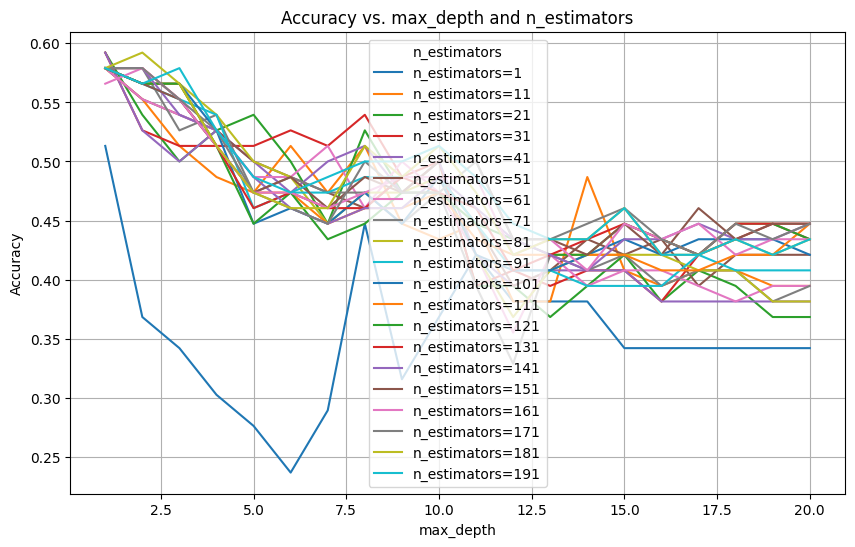

In [119]:
import matplotlib.pyplot as plt
# 提取特征和标签
X = data1[["母亲年龄", "教育程度","CBTS", "EPDS", "HADS"]]
y = data["综合睡眠质量"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置参数范围
n_estimators_range = range(1, 201, 10)
max_depth_range = range(1, 21)

# 存储准确率
accuracies = np.zeros((len(n_estimators_range), len(max_depth_range)))

# 建立随机森林模型并计算准确率
for i, n_estimators in enumerate(n_estimators_range):
    for j, max_depth in enumerate(max_depth_range):
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        accuracies[i, j] = accuracy_score(y_test, y_pred)

# 绘制准确率随参数变化的曲线
plt.figure(figsize=(10, 6))
for i in range(len(n_estimators_range)):
    plt.plot(max_depth_range, accuracies[i, :], label="n_estimators={}".format(n_estimators_range[i]))

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(title="n_estimators")
plt.title("Accuracy vs. max_depth and n_estimators")
plt.grid(True)
plt.show()


# 其他模型svm knn

In [120]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [140]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置参数范围
C_range = np.logspace(0, 4, 7)
k_range = range(1, 21)

# 存储准确率
svm_accuracies = np.zeros((len(C_range),))
knn_accuracies = np.zeros((len(k_range),))

In [141]:
# 使用支持向量机模型并计算准确率
for i, C in enumerate(C_range):
    svm_model = SVC(C=C, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    svm_accuracies[i] = accuracy_score(y_test, y_pred)

In [142]:
# 使用K近邻模型并计算准确率
for i, k in enumerate(k_range):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    knn_accuracies[i] = accuracy_score(y_test, y_pred)

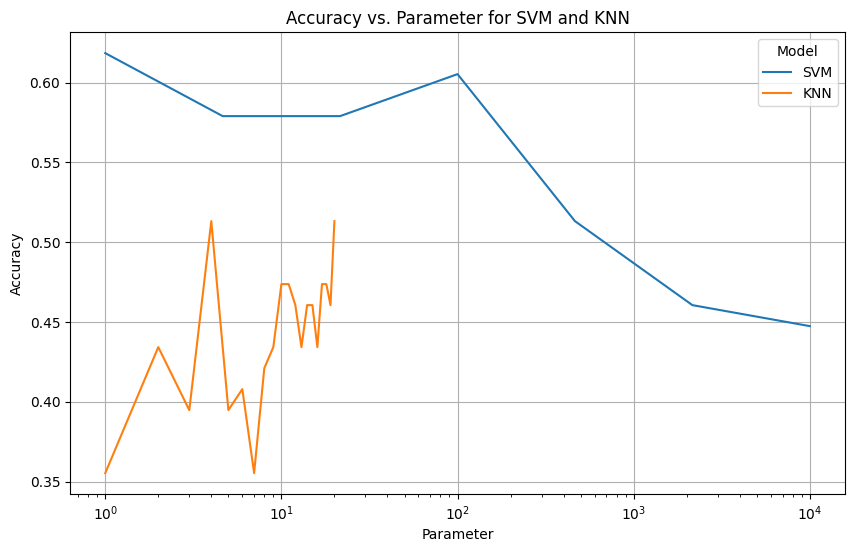

In [143]:
# 绘制准确率随参数变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(C_range, svm_accuracies, label="SVM")
plt.plot(k_range, knn_accuracies, label="KNN")
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.title("Accuracy vs. Parameter for SVM and KNN")
plt.grid(True)
plt.xscale('log')
plt.show()

# mlp 降维

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [138]:
X = data1[["母亲年龄", "婚姻状况", "教育程度", "妊娠时间", "分娩方式", "CBTS", "EPDS", "HADS"]]
y = data["综合睡眠质量"]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用PCA降维
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 设置参数范围
C_range = np.logspace(0, 4, 10)
k_range = range(1, 21)
hidden_layer_sizes_range = [(50,), (100,), (50, 50),(25,50,100)]

# 存储准确率
svm_accuracies = np.zeros((len(C_range),))
knn_accuracies = np.zeros((len(k_range),))
mlp_accuracies = np.zeros((len(hidden_layer_sizes_range),))

# 使用支持向量机模型并计算准确率
for i, C in enumerate(C_range):
    svm_model = SVC(C=C, random_state=42)
    svm_model.fit(X_train_pca, y_train)
    y_pred = svm_model.predict(X_test_pca)
    svm_accuracies[i] = accuracy_score(y_test, y_pred)

# 使用K近邻模型并计算准确率
for i, k in enumerate(k_range):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_pca, y_train)
    y_pred = knn_model.predict(X_test_pca)
    knn_accuracies[i] = accuracy_score(y_test, y_pred)

# 使用多层感知机模型并计算准确率
for i, hidden_layer_sizes in enumerate(hidden_layer_sizes_range):
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    mlp_model.fit(X_train_pca, y_train)
    y_pred = mlp_model.predict(X_test_pca)
    mlp_accuracies[i] = accuracy_score(y_test, y_pred)

D:\anaconda\envs\clone1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\envs\clone1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\envs\clone1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\envs\clone1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


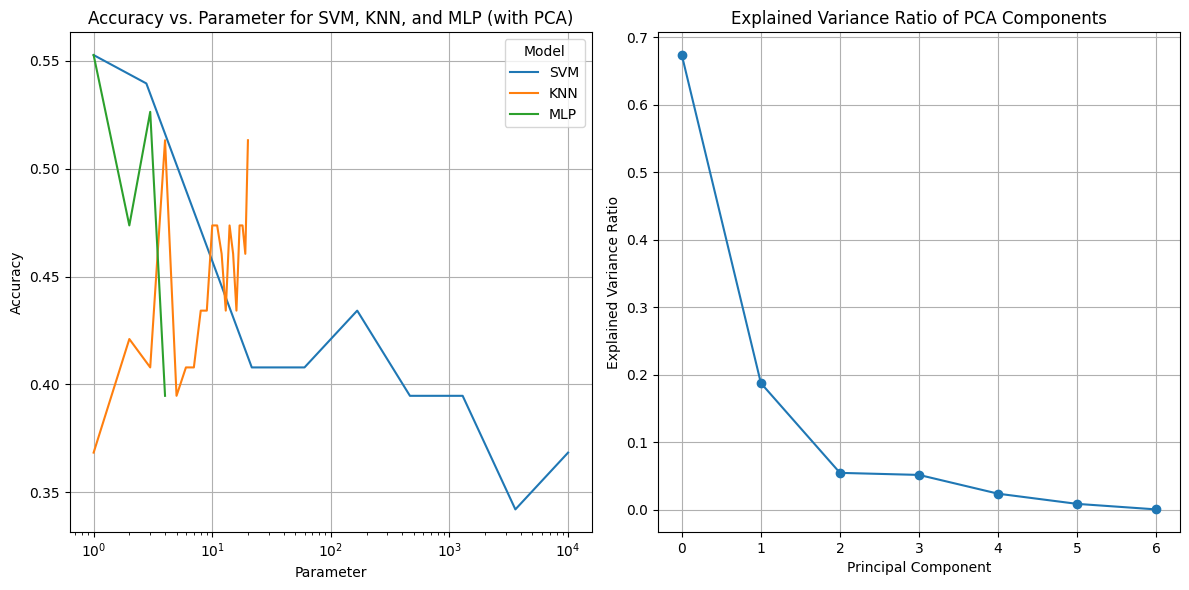

In [139]:
# 绘制准确率随参数变化的曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(C_range, svm_accuracies, label="SVM")
plt.plot(k_range, knn_accuracies, label="KNN")
plt.plot(range(1, len(hidden_layer_sizes_range) + 1), mlp_accuracies, label="MLP")
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.title("Accuracy vs. Parameter for SVM, KNN, and MLP (with PCA)")
plt.grid(True)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of PCA Components")
plt.grid(True)

plt.tight_layout()
plt.show()

In [168]:
data_com=pd.read_excel("complete.xlsx")
print(data.iloc[229,:])

编号          237
母亲年龄         33
婚姻状况          2
教育程度          5
妊娠时间       41.0
分娩方式          1
CBTS         10
EPDS         28
HADS         19
婴儿行为特征        3
婴儿性别          2
婴儿年龄（月）       3
整晚睡眠时间      600
睡醒次数         10
入睡方式          5
综合睡眠质量        良
Name: 229, dtype: object
